input takes 224,224 3 channel image
64 channels after conv1
64 again with same dimesion conv2

maxpooling reduced image to half - 112,112 64 channels
128 channels conv 3
128 channels conv 4

maxpool again to make half 56,56 128 channels
256 channel conv 5
256 channel conv 6
256 channel conv 7

maxpool again to reduce 28,28 with 256 channels
512 channel conv 8
512 channel conv 9
512 channel conv 10

maxpool again to make 14,14 with 512 channels
512 channel conv 11
512 channel conv 12
512 channel conv 13

maxpool to make 7,7 with 512 channels
flatten to make 25088 values
fully connected 1 4096
fully connected 2 4096

final dense prediction with 1000 outputs of imagenet

In [7]:
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layers in model.layers:
    print(layers.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [10]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


channel last format
depth of the filter must match the depth of input for the filter

for an input image with 3 channel - RGB 
we can visualise one filter as a plot with 3 images, one for each channel

or can compress 3 channels into 1 - still 63 more to visualize


In [42]:
# for the first layer
# filter, biases = model.layers[0].output.get_weights() # tensor has not object get_weights
# output of the layer is a tensor - that is not weights

type(model.layers[1]) # tensorflow.python.keras.layers.convolutional.Conv2D

filter, biases = model.layers[1].get_weights() # tensor has not object get_weights
filter.shape

(3, 3, 3, 64)

In [20]:
model.layers[0].output.shape
model.layers[0].output.name

'input_3:0'

In [21]:
model.layers[1].input.name

# the input of one is the output of previous one
# this is just like linked lists - covering all the values of the model

'input_3:0'

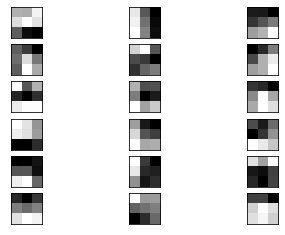

In [43]:
from matplotlib import pyplot as plt
# plotting the filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:,:,:,i]
    # plot the filter
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # plot filter channels in grayscale
        plt.imshow(f[:,:,j], cmap='gray')
        ix += 1
plt.show()

In [44]:
f

array([[[-0.00015223,  0.00135788, -0.00504664, ...,  0.00349678,
          0.00127733, -0.01760248],
        [-0.0042193 , -0.00428369, -0.00488854, ..., -0.00082621,
          0.00947703, -0.01716787],
        [ 0.00142437, -0.00419647, -0.00811489, ...,  0.00114329,
          0.01449443, -0.01928296]],

       [[ 0.00873817, -0.00740686,  0.00207562, ..., -0.00034642,
          0.00483277, -0.0131816 ],
        [ 0.00648991, -0.00646745,  0.00433064, ..., -0.0050802 ,
          0.01188056, -0.00886193],
        [ 0.00896835, -0.00575299,  0.00268265, ..., -0.00881005,
          0.01205773, -0.01843777]],

       [[ 0.01878544, -0.01281616,  0.00274524, ..., -0.00472345,
          0.00255884, -0.00889258],
        [ 0.02188619, -0.01036999,  0.00381488, ..., -0.00954801,
          0.00895035, -0.0034732 ],
        [ 0.02062797, -0.00699785,  0.00196754, ..., -0.00671082,
          0.01000218, -0.01846195]]], dtype=float32)

In [45]:
# now lets normalize the filters
# using min max normalization - that is very easy
# sub from the min, divide by the range ( max - min )

# initially we do number/max and get result - but now lets subract min too

f_min, f_max = filters.min(), filters.max()
norm_filters = (filters - f_min)/(f_max - f_min)
print('before: ',f_min, f_max)
f_min, f_max = norm_filters.min(), norm_filters.max()
print('after: ',f_min, f_max)

before:  -0.09288482 0.28699666
after:  0.0 1.0


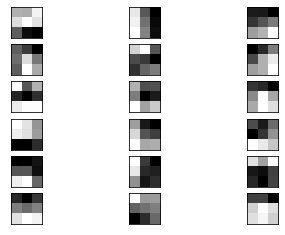

In [50]:
# visualize after normalization 
n_filters, ix = 6, 1
for i in range(n_filters):
    f = norm_filters[:,:,:,i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:,:,j], cmap='gray')
        ix += 1
plt.show()

# 6 out of 64 filters in first conv layer

In [41]:
f.shape

(3, 3, 512)

In [51]:
# we will not be able to see the 2nd conv layer filters
# and so futher more - 64 channels in a row for 64 filters (64x64 subplots)

## Visualizing Feature Maps

In [60]:
# activation maps - called feature maps capture the result of applying filter to input
# input image or another feature map

# idea is to visualize feature map for specific input image and understand what
# features of input are detected or preserved in feature maps.

# maps close to input - detect find grained details
# maps close to output - capture general features

# sumamrize feature map size for each conv layer
conv_count = 0
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    conv_count += 1
    filters, biases = layer.get_weights()
    print(i, conv_count, layer.name, layer.output.shape, filters.shape)
    
# in total there are 16 layers - 13 conv layers

1 1 block1_conv1 (None, 224, 224, 64) (3, 3, 3, 64)
2 2 block1_conv2 (None, 224, 224, 64) (3, 3, 64, 64)
4 3 block2_conv1 (None, 112, 112, 128) (3, 3, 64, 128)
5 4 block2_conv2 (None, 112, 112, 128) (3, 3, 128, 128)
7 5 block3_conv1 (None, 56, 56, 256) (3, 3, 128, 256)
8 6 block3_conv2 (None, 56, 56, 256) (3, 3, 256, 256)
9 7 block3_conv3 (None, 56, 56, 256) (3, 3, 256, 256)
11 8 block4_conv1 (None, 28, 28, 512) (3, 3, 256, 512)
12 9 block4_conv2 (None, 28, 28, 512) (3, 3, 512, 512)
13 10 block4_conv3 (None, 28, 28, 512) (3, 3, 512, 512)
15 11 block5_conv1 (None, 14, 14, 512) (3, 3, 512, 512)
16 12 block5_conv2 (None, 14, 14, 512) (3, 3, 512, 512)
17 13 block5_conv3 (None, 14, 14, 512) (3, 3, 512, 512)


In [63]:
# defining a new model that is subset of vgg16 model
# model would have same input layer as original model
# output will be output of given conv layer - which would be the activation of the layer or feature map
from tensorflow.keras import Model

model2 = Model(inputs=model.inputs, outputs=model.layers[1].output) 

In [64]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
